In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import sqlite3

In [11]:
con = sqlite3.connect(r'D:\Amazon_Data_Analysis/database.sqlite')

In [12]:
type(con)

sqlite3.Connection

In [13]:
df=pd.read_sql_query('SELECT * FROM REVIEWS',con)

In [14]:
df.shape

(568454, 10)

In [19]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
 df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] ## Invalid row

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [21]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [22]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [23]:
df_valid.shape

(568452, 10)

In [24]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [25]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [24]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [26]:
df_valid.drop_duplicates()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [27]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [28]:
data.shape

(393931, 10)

In [30]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [31]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [32]:
data['Time']=pd.to_datetime(data['Time'],unit='s')

C:\Users\HP\AppData\Local\Temp\ipykernel_7724\796006669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']=pd.to_datetime(data['Time'],unit='s')


In [33]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Analyze to what User Amazon can recommend more product?

In [34]:
data.shape

(393931, 10)

In [35]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [36]:
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [37]:
data['ProfileName'].nunique()

218418

In [38]:
data['UserId'].nunique()

256059

In [45]:
data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'count','ProductId':'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,1,1
#oc-R109MU5OBBZ59U,1,1,1,1
#oc-R10LFEMQEW6QGZ,1,1,1,1
#oc-R10LT57ZGIB140,1,1,1,1
#oc-R10UA029WVWIUI,1,1,1,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,3,3
AZZVNIMTTMJH6,1,1,1,1
AZZY649VYAHQS,1,1,1,1


In [39]:
recmd_df=data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'count','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

In [40]:
recmd_df.columns=['Number_of_summaries','num_text','avg_score','No_of_prods_purchased']

In [41]:
recmd_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,329,329
A3OXHLG6DIBRW8,278,278,278,278
A281NPSIMI1C2R,259,259,259,259
A1YUL9PCJR3JTY,214,214,214,214
A1Z54EM24Y40LL,211,211,211,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,1,1
A2E80RT3HOR35T,1,1,1,1
A2E816C5N51F6X,1,1,1,1


In [42]:
recmd_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [55]:
recmd_df['No_of_prods_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

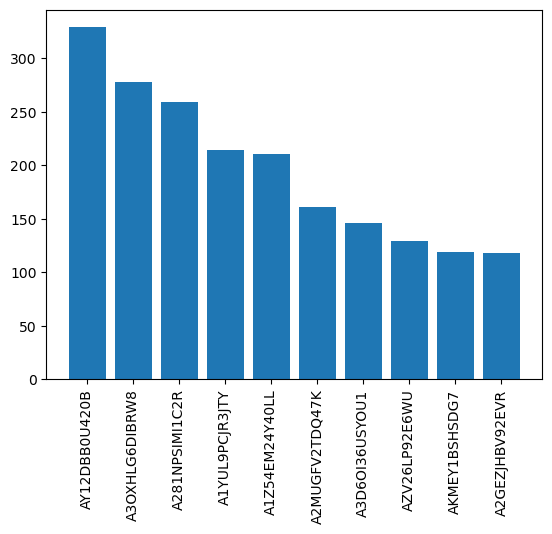

In [60]:
plt.bar(recmd_df.index[0:10],recmd_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')

In [ ]:
# Which Product has good number of Reviews?

In [43]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [64]:
len(data['ProductId'].unique())

67624

In [69]:
prod_count=data['ProductId'].value_counts().to_frame()

In [70]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [72]:
prod_count['count']>500

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: count, Length: 67624, dtype: bool

In [73]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [74]:
prod_count[prod_count['count']>500].index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [75]:
freq_prod_id = prod_count[prod_count['count']>500].index

In [76]:
freq_prod_id

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [81]:
data['ProductId'].isin(freq_prod_id)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [82]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_id)]

In [83]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


AttributeError: 'numpy.int64' object has no attribute 'startswith'

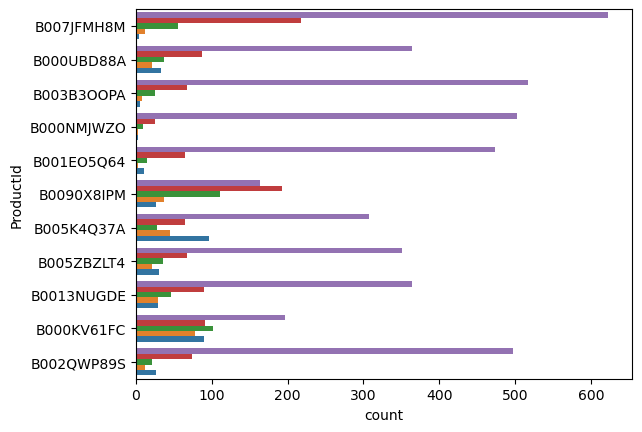

In [88]:
sns.countplot(y='ProductId', data = freq_prod_df, hue='Score')

In [ ]:
# Is there any difference between behaviour of frequent viewers & not frequent viewers

In [89]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [93]:
x = data['UserId'].value_counts()

In [94]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [92]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [102]:
data['viewers_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [103]:
data['viewers_type']

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: viewers_type, Length: 393931, dtype: object

In [104]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [105]:
data['viewers_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [ ]:
# Is there any difference between frequent viewers and not frequent viewers

In [111]:
not_freq_df = data[data['viewers_type']=='Not Frequent']
freq_df = data[data['viewers_type']=='Frequent']

In [112]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [114]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

<Axes: xlabel='Score'>

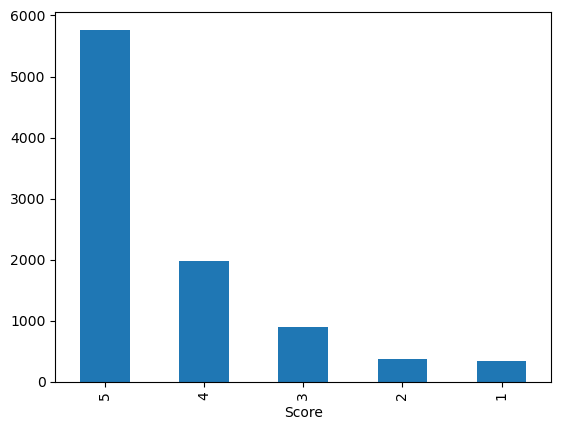

In [116]:
freq_df['Score'].value_counts().plot(kind='bar')

<Axes: xlabel='Score'>

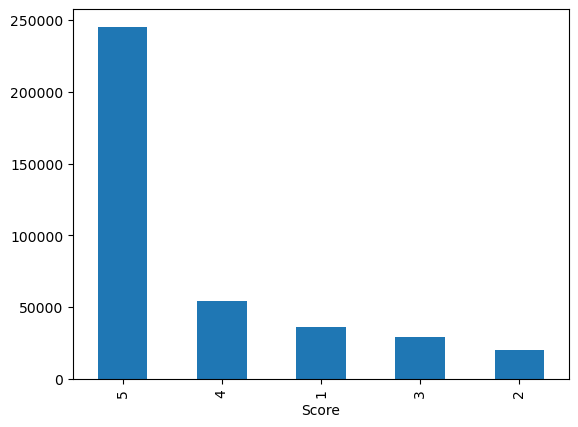

In [117]:
not_freq_df['Score'].value_counts().plot(kind='bar')

In [ ]:
 # Are frequent users more verbose?

In [118]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewers_type'],
      dtype='object')

In [121]:
data[['ProductId','UserId','Text']]

,ProductId,UserId,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,Great taffy at a great price. There was a wid...
...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,These are the BEST treats for training and rew...


In [124]:
len(data['Text'][0].split(' '))

49

In [125]:
def calculate_length(text):
    return len(text.split(' '))

In [126]:
data['Text_length']=  data['Text'].apply(calculate_length)

In [128]:
data['viewers_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [129]:
not_freq_data = data[data['viewers_type']=='Not Frequent']
freq_data = data[data['viewers_type']=='Frequent']

In [130]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


(0.0, 600.0)

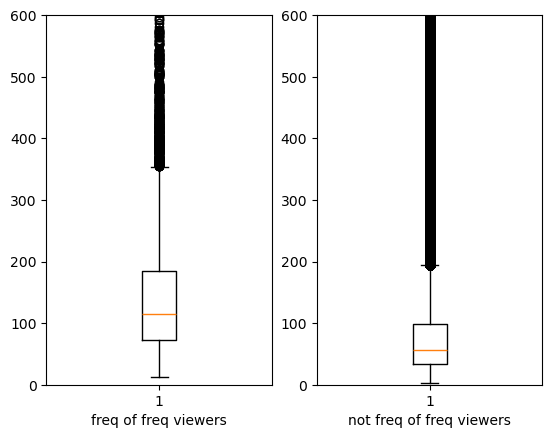

In [137]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('freq of freq viewers')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('not freq of freq viewers')
ax2.set_ylim(0,600)

In [ ]:
# Sentiment Analysis (Positive and Negative Reviews)

In [1]:
 !pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 325.1 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/626.3 kB 409.6 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/626.3 kB 952.6 kB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.1 MB/s eta 0:00:00


In [5]:
from textblob import TextBlob

In [44]:
data['Summary'][0]

'Good Quality Dog Food'

In [46]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [53]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [47]:
data.shape

(393931, 10)

In [48]:
sample=data[0:50000]

In [64]:
polarity = []

for text in sample['Summary']:
    try:
    polarity.append(TextBlob(text).sentiment.polarity)
    except:
    polarity.append(0)

IndentationError: expected an indented block after 'try' statement on line 4 (807876014.py, line 5)

In [65]:
len(polarity)

50000

In [66]:
sample['polarity']=polarity

In [67]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [71]:
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [72]:
sample_negative['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4659, dtype: object

In [73]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
54248                 My favorite nescafe dolce flavor
54249                                  My 2nd Favorite
54250                      Best of 5 flavors available
54252                                 pricey but good.
54253                         Best I have found so far
Name: Summary, Length: 29155, dtype: object